# Honeybee Data

Reference article: https://data-for-good.pubpub.org/pub/rg3364dl/release/2

Things to understand:
Apiary: An apiary is a location where beehives of honey bees are kept. Can come in many sizes and can be urban or rural. An apiary is a place where beehives are kept.

HCC: Healthy Colony Checklist

Brood: Eggs, larvae, and pupae of honeybees.


In [1]:
# imports
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# apiary dataset
apiary = pd.read_csv('Apiary_Information.csv')
apiary

,ApiaryID,Apiary,City,State
0,1,BBCC,Durham,NC
1,2,BBCC-RTP,Durham,NC
2,3,BBTS,Clayton,NC
3,4,Beesboro,Durham,NC
4,5,Fresno,Durham,NC
5,6,Juniper Level,Durham,NC
6,7,Lakeview,Salt Lake City,UT
7,8,Leesville,Durham,NC
8,9,Mike C,Salt Lake City,UT
9,10,Roestenburg,Salt Lake City,UT


In [3]:
# hcc dataset 
hcc = pd.read_csv('HCC_Inspections.csv')
hcc

,InpsectionID,HiveID,InsptDate,Brood,Bees,Queen,Food,Stressors,Space,Percent_Met,Healthy
0,1,1,2016-06-15,1.0,1.0,1.0,1.0,0.0,1.0,83,No
1,2,1,2016-07-22,1.0,1.0,1.0,1.0,0.0,1.0,83,No
2,3,1,2016-08-01,1.0,1.0,1.0,1.0,1.0,1.0,100,Yes
3,4,1,2016-08-08,1.0,1.0,1.0,1.0,1.0,1.0,100,Yes
4,5,1,2016-08-15,1.0,1.0,1.0,1.0,0.0,1.0,83,No
...,...,...,...,...,...,...,...,...,...,...,...
2399,2400,188,2018-09-24,1.0,1.0,0.0,1.0,1.0,1.0,83,No
2400,2401,188,2018-10-01,1.0,1.0,0.0,1.0,1.0,1.0,83,No
2401,2402,188,2018-10-01,1.0,1.0,0.0,1.0,1.0,1.0,83,No
2402,2403,188,2018-10-08,1.0,1.0,0.0,1.0,1.0,1.0,83,No


In [4]:
# hive info dataset
hive = pd.read_csv('Hive_Information.csv')
hive

,HiveID,Hive_Tag,ApiaryID
0,1,H003-P2,1
1,2,H007-NA,1
2,3,H1,1
3,4,HT101,1
4,5,HT102,1
...,...,...,...
183,184,H04-IQBA,11
184,185,2,12
185,186,Hive #4,12
186,187,2,13


In [5]:
# hourly weather dataset
weather_hour = pd.read_csv('Hourly_Weather.csv')
weather_hour

,WeatherID,ObsID,StationID,Temperature,Humidity,Dew_Point,Wind_Direction,Wind_Speed,Wind_Gust,Pressure,Precip,Condition,Sunrise,Sunset,Daylight_Hours
0,1,1,1,54,45,33,VAR,7,0,29.54,0.0,Fair,7:07:00,19:35:00,12:28:00
1,2,2,1,52,47,32,NNW,3,0,29.56,0.0,Fair,7:07:00,19:35:00,12:28:00
2,3,3,1,51,48,32,CALM,0,0,29.57,0.0,Fair,7:07:00,19:35:00,12:28:00
3,4,4,1,48,56,33,CALM,0,0,29.57,0.0,Fair,7:07:00,19:35:00,12:28:00
4,5,5,1,46,63,34,CALM,0,0,29.58,0.0,Fair,7:07:00,19:35:00,12:28:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3667,3668,1772,3,79,25,40,N,5,0,25.60,0.0,Mostly Cloudy,6:13:00,20:37:00,14:24:00
3668,3669,1773,3,75,29,41,NNW,17,0,25.63,0.0,Partly Cloudy,6:13:00,20:37:00,14:24:00
3669,3670,1774,3,70,41,45,NNW,9,0,25.63,0.0,Partly Cloudy,6:13:00,20:37:00,14:24:00
3670,3671,1775,3,64,56,48,WSW,7,0,25.65,0.0,Partly Cloudy,6:13:00,20:37:00,14:24:00


In [6]:
# weather observations dataset
weather_obs = pd.read_csv('Weather_Observations.csv')
weather_obs

,ObsID,Date,Obs_Time,Obs_Hour
0,1,3/29/2016,0:51,0
1,2,3/29/2016,1:51,1
2,3,3/29/2016,2:51,2
3,4,3/29/2016,3:51,3
4,5,3/29/2016,4:51,4
...,...,...,...,...
1771,1772,5/13/2019,19:54,19
1772,1773,5/13/2019,20:54,20
1773,1774,5/13/2019,21:54,21
1774,1775,5/13/2019,22:54,22


In [7]:
# weather stations dataset
weather_station = pd.read_csv('Weather_Stations.csv')
weather_station

,StationID,Station_City,Station
0,1,Clayton,KRDU
1,2,Durham,KRDU
2,3,Salt Lake City,KSLC


Research Question: What are the internal and external factors that affect honey production? 
Do healthy hives produce more honey?

Something to note: The scale_data dataset was not included. Therefore, other literature review will be used to see typical honey hive weight to predict honey production.

# Exploring

Looking at weather data by State to get a better understanding of location.

In [8]:
# join hourly weather with weather stations
weather_hourly_station = weather_hour.merge(weather_station, on = 'StationID', how = 'left')


# join with apiary
weather_with_state = weather_hourly_station.merge(
    apiary[['City', 'State']],
    left_on = 'Station_City',
    right_on = 'City',
    how = 'left')
weather_with_state

,WeatherID,ObsID,StationID,Temperature,Humidity,Dew_Point,Wind_Direction,Wind_Speed,Wind_Gust,Pressure,Precip,Condition,Sunrise,Sunset,Daylight_Hours,Station_City,Station,City,State
0,1,1,1,54,45,33,VAR,7,0,29.54,0.0,Fair,7:07:00,19:35:00,12:28:00,Clayton,KRDU,Clayton,NC
1,1,1,1,54,45,33,VAR,7,0,29.54,0.0,Fair,7:07:00,19:35:00,12:28:00,Clayton,KRDU,Clayton,NC
2,2,2,1,52,47,32,NNW,3,0,29.56,0.0,Fair,7:07:00,19:35:00,12:28:00,Clayton,KRDU,Clayton,NC
3,2,2,1,52,47,32,NNW,3,0,29.56,0.0,Fair,7:07:00,19:35:00,12:28:00,Clayton,KRDU,Clayton,NC
4,3,3,1,51,48,32,CALM,0,0,29.57,0.0,Fair,7:07:00,19:35:00,12:28:00,Clayton,KRDU,Clayton,NC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14755,3672,1776,3,67,51,48,CALM,0,0,25.66,0.0,Mostly Cloudy,6:13:00,20:37:00,14:24:00,Salt Lake City,KSLC,Salt Lake City,UT
14756,3672,1776,3,67,51,48,CALM,0,0,25.66,0.0,Mostly Cloudy,6:13:00,20:37:00,14:24:00,Salt Lake City,KSLC,Salt Lake City,UT
14757,3672,1776,3,67,51,48,CALM,0,0,25.66,0.0,Mostly Cloudy,6:13:00,20:37:00,14:24:00,Salt Lake City,KSLC,Salt Lake City,UT
14758,3672,1776,3,67,51,48,CALM,0,0,25.66,0.0,Mostly Cloudy,6:13:00,20:37:00,14:24:00,Salt Lake City,KSLC,Salt Lake City,UT


In [9]:
weather_with_state['State'].unique()

array(['NC', 'UT'], dtype=object)

Now that I have this dataframe with weather information by State, I can look into the differences between Utah and North Carolina.

In [10]:
# boxplot of temperature by State

weather_with_state[['Temperature', 'State']]

# temperature is an object, need to convert to numeric in order to look at boxplot

weather_with_state['Temperature'].unique()

array(['54\xa0', '52\xa0', '51\xa0', '48\xa0', '46\xa0', '45\xa0',
       '47\xa0', '55\xa0', '58\xa0', '59\xa0', '62\xa0', '63\xa0',
       '65\xa0', '66\xa0', '64\xa0', '57\xa0', '53\xa0', '49\xa0',
       '56\xa0', '60\xa0', '69\xa0', '73\xa0', '75\xa0', '76\xa0',
       '81\xa0', '78\xa0', '79\xa0', '70\xa0', '68\xa0', '67\xa0',
       '80\xa0', '83\xa0', '71\xa0', '77\xa0', '74\xa0', '72\xa0',
       '61\xa0', '82\xa0', '86\xa0', '88\xa0', '93\xa0', '95\xa0',
       '87\xa0', '89\xa0', '90\xa0', '84\xa0', '85\xa0', '91\xa0',
       '92\xa0', nan, '94\xa0', '96\xa0', '43\xa0', '44\xa0', '50\xa0',
       '42\xa0', '40\xa0', '41\xa0', '39\xa0', '37\xa0', '36\xa0',
       '34\xa0', '32\xa0', '38\xa0'], dtype=object)

I was having a hard time converting the temperature object to numerical values. After looking at it, it seems like they all have '\xa0' at the end.

In [11]:
weather_with_state["Temperature"] = pd.to_numeric(weather_with_state['Temperature'].astype(str).str.replace('\xa0', '', regex=True), errors='coerce')

weather_with_state['Temperature']

0        54.0
1        54.0
2        52.0
3        52.0
4        51.0
         ... 
14755    67.0
14756    67.0
14757    67.0
14758    67.0
14759    67.0
Name: Temperature, Length: 14760, dtype: float64

Text(0, 0.5, 'Temperature (°F)')

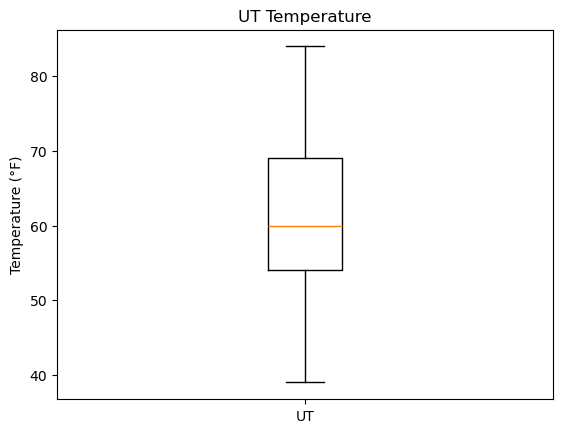

In [21]:
# now make boxplot
ut_temp = weather_with_state[weather_with_state['State'] == 'UT']['Temperature']
ut_temp
plt.boxplot(ut_temp, labels = ['UT'])
plt.title('UT Temperature')
plt.ylabel('Temperature (°F)')

Text(0, 0.5, 'Temperature (°F)')

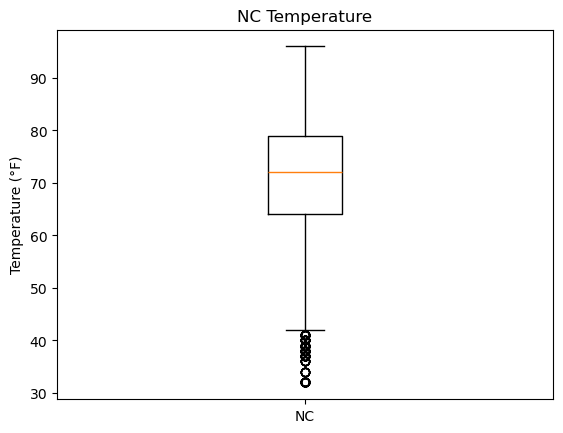

In [20]:
nc_temp = weather_with_state[weather_with_state['State'] == 'NC']['Temperature']
nc_temp
plt.boxplot(nc_temp, labels = ['NC'])
plt.title('NC Temperature')
plt.ylabel('Temperature (°F)')

float64
64
14400


Text(0, 0.5, 'Temperature (°F)')

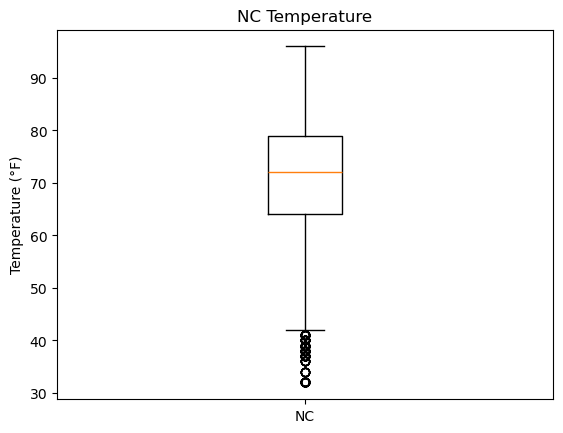

In [19]:
# why does nothing show up for NC?
print(nc_temp.dtypes)
print(nc_temp.isna().sum())
print(len(nc_temp))

# there are 64 missing values in NC temp. I will just drop them.
weather_with_state = weather_with_state.dropna()

new_nc_temp = weather_with_state[weather_with_state['State'] == 'NC']['Temperature']
new_nc_temp.isna().sum()
len(new_nc_temp)

# now try boxplot
plt.boxplot(new_nc_temp, labels = ['NC'])
plt.title('NC Temperature')
plt.ylabel('Temperature (°F)')

Text(0, 0.5, 'Temperature (°F)')

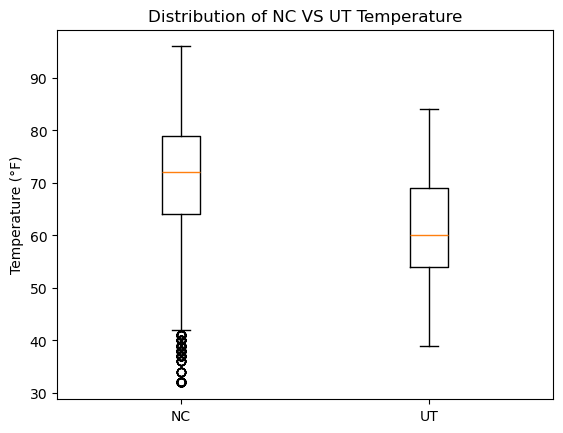

In [22]:
# okay now try with both
grouped_states = weather_with_state.groupby('State')['Temperature'].apply(list)
grouped_states

plt.boxplot(grouped_states.values, labels = grouped_states.index)
plt.title('Distribution of NC VS UT Temperature')
plt.ylabel('Temperature (°F)')

From this boxplot, we see that North Carolina has a higher median temperature compared to Utah. <br>
The minimum and maximum temperatures are also consistent with this where North Carolina's temperatures are higher than Utah's. <br>
There are outliers in North Carolina where lower temperatures are present.

# Running into an issue in this project because there is no data on how much honey is produced. If I don't have that, what do I compare the predictions to? Will probably come back to this later.